<h1 style="color:#3425ec;"><center><font face="Microsoft Uighur" size="6">بسم الله الرحمن الرحيم</font></center></h1>

<h3 style="color:#2646fc;"><center><font face="Microsoft Uighur" size="6">تمرین درس مدل‌های گرافی احتمالاتی</font></center></h3>
<h3 style="color:#2646fc;direction:rtl;"><center><font face="Microsoft Uighur" size="6"> پیاده‌سازی ICU Alarms به زبان پایتون </font></center></h3>

 
<p style="text-align: right;"><font face="Microsoft Uighur" size="5">
نام و نام خانوادگی : فرزانه فخریان
 </font></p>
<p style="text-align: right;"><font face="Microsoft Uighur" size="5">شماره دانشجویی : 96725008</font></p>

-----

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import pgmpy
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
import sys
from pgmpy import readwrite
from pgmpy.models import BayesianModel
from scipy.special import (comb, chndtr, entr, rel_entr, xlogy, ive)
import matplotlib.pyplot as plt

-----
<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5"> فایل داده و bif تغییر داده شده است. دو فایل تغییر داده  به همراه کد فرستاده شده است.</font> </p>
<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5"> </font> </p>

-----

In [5]:
xml = pgmpy.readwrite.BIF.BIFReader('alarm_edited.bif')
data = pd.read_csv('alarm10K_edited.csv',delimiter=',').apply(lambda x: x.astype(str))

edges = [tuple(edge) for edge in xml.get_edges()]
real_model = xml.get_model()
real_state_names = xml.variable_states


In [7]:
KLMLE = np.zeros(shape=(100,))
KLAppMLE = np.zeros(shape=(100,))
KLBpe5 = np.zeros(shape=(100,))
KLBpe20 = np.zeros(shape=(100,))
KLBpe50 = np.zeros(shape=(100,)) 

In [9]:
for node in list(real_state_names.keys()):
    
    print("node: " + str(node))

    for i in range(100, 10100, 100):
        trainData = pd.DataFrame(data[:i])
        NewModel = BayesianModel(edges)

        MLE_estimator = MaximumLikelihoodEstimator(model=NewModel, data=trainData, state_names=real_state_names)
        BPE5_estimator = BayesianEstimator(model=NewModel, data=trainData, state_names=real_state_names)
        BPE20_estimator = BayesianEstimator(model=NewModel, data=trainData, state_names=real_state_names)
        BPE50_estimator = BayesianEstimator(model=NewModel, data=trainData, state_names=real_state_names)
        AppMLE_estimator = BayesianEstimator(model=NewModel, data=trainData, state_names=real_state_names)

        qk = np.asarray(xml.variable_cpds[node])
        qk[qk == 0.0] = 0.00000001

        idx = i//100 - 1
        
        mle_nodeCpd = MLE_estimator.estimate_cpd(node)
        KLMLE[idx] += np.mean(entropy(pk=qk, qk=np.asarray(mle_nodeCpd.get_values())))
        approximatedMle_nodeCpd = AppMLE_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=0.00001)
        KLAppMLE[idx] += np.mean(entropy(pk=qk, qk=np.asarray(approximatedMle_nodeCpd.get_values())))
        bpe5_nodeCpd = BPE5_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=5)
        KLBpe5[idx] += np.mean(entropy(pk=qk, qk=np.asarray(bpe5_nodeCpd.get_values())))
        bpe20_nodeCpd = BPE20_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=20)
        KLBpe20[idx] += np.mean(entropy(pk=qk, qk=np.asarray(bpe20_nodeCpd.get_values())))
        bpe50_nodeCpd = BPE50_estimator.estimate_cpd(node, prior_type="BDeu", equivalent_sample_size=50)
        KLBpe50[idx] += np.mean(entropy(pk=qk, qk=np.asarray(bpe50_nodeCpd.get_values())))


node: PAP
node: LVEDVOLUME
node: BP
node: VENTTUBE
node: TPR
node: ANAPHYLAXIS
node: HRBP
node: VENTMACH
node: CO
node: VENTALV
node: SAO2
node: INTUBATION
node: MINVOL
node: HRSAT
node: VENTLUNG
node: FIO2
node: CVP
node: INSUFFANESTH
node: DISCONNECT
node: EXPCO2
node: PCWP
node: CATECHOL
node: ERRCAUTER
node: ERRLOWOUTPUT
node: LVFAILURE
node: HREKG
node: PRESS
node: STROKEVOLUME
node: MINVOLSET
node: PULMEMBOLUS
node: HISTORY
node: ARTCO2
node: HYPOVOLEMIA
node: KINKEDTUBE
node: HR
node: PVSAT
node: SHUNT


-----
<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5">نتیجه مطابق آنچه که در کتاب گزارش شده است به شکل زیر به دست آمده است. تصویر نتیجه نهایی در فایل نیز موجود است.</font> </p>

<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5">  نتایج به دست آمده و همچنین فایل کامل پروژه در لینک زیر   موجود است. </font> </p>

<p style="text-align: right;direction:rtl;"><font face="Microsoft Uighur" size="5"> https://github.com/farzanefakhrian/ICU_Alarms </font> </p>


-----

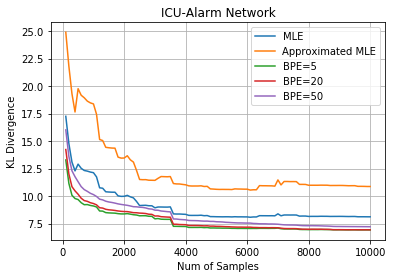

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(range(100, 10100, 100), KLMLE, label='MLE')
plt.plot(range(100, 10100, 100), KLAppMLE, label='Approximated MLE')
plt.plot(range(100, 10100, 100), KLBpe5, label='BPE=5')
plt.plot(range(100, 10100, 100), KLBpe20, label='BPE=20')
plt.plot(range(100, 10100, 100), KLBpe50, label='BPE=50')

plt.xlabel('Num of Samples')
plt.ylabel('KL Divergence')
plt.title('ICU-Alarm Network')
plt.grid(True)
plt.legend()
plt.show()